**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import re
import nltk

In [3]:
movies_df = pd.read_csv("source_data/movies_metadata.csv")

C:\Users\chanc\AppData\Local\Temp\ipykernel_24620\1223631877.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("source_data/movies_metadata.csv")


**READ DATASETS**

In [15]:
ratings_df = pd.read_csv("source_data/ratings.csv")
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [16]:
# Convert the ratings from a 0-5 scale to a 0-10 scale by multiplying by 2
ratings_df['rating'] = ratings_df['rating'] * 2

In [17]:
# Display the first few rows to ensure the conversion is correct
print(ratings_df.head())

   userId  movieId  rating   timestamp
0       1      110     2.0  1425941529
1       1      147     9.0  1425942435
2       1      858    10.0  1425941523
3       1     1221    10.0  1425941546
4       1     1246    10.0  1425941556


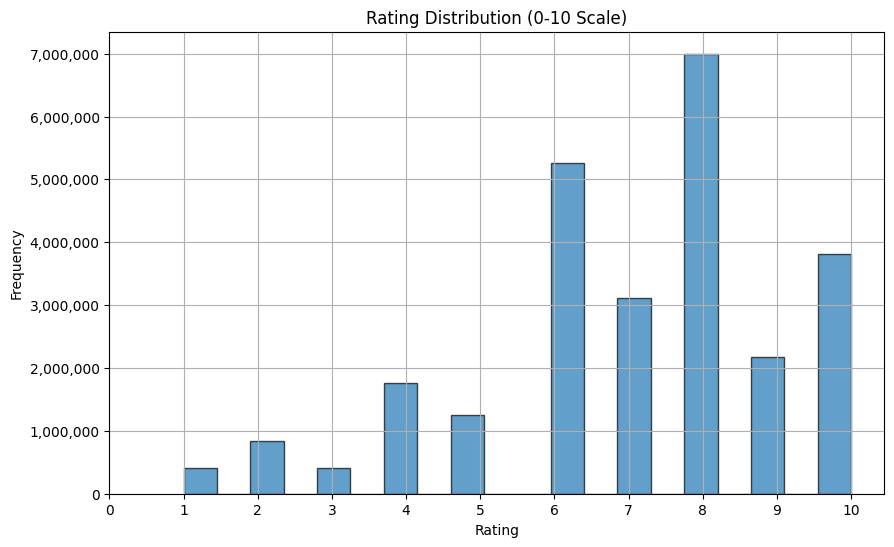

In [22]:
import matplotlib.ticker as ticker

# Plotting the rating distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Rating Distribution (0-10 Scale)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# Format y-axis to show the numbers without scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Ensure all numbers on the x-axis are shown
plt.xticks(range(0, 11))
plt.grid(True)
plt.show()

**Filter low and high ratings**

In [23]:
# Filter ratings above 5 and create a new DataFrame
high_ratings_df = ratings_df[ratings_df['rating'] > 5]

In [24]:
# Filter ratings of 5 or below and create a new DataFrame called "low_ratings"
low_ratings_df = ratings_df[ratings_df['rating'] <= 5]

In [28]:
# Display the first few rows of each DataFrame to verify
high_ratings_df.head(), low_ratings_df.head()

(   userId  movieId  rating   timestamp
 1       1      147     9.0  1425942435
 2       1      858    10.0  1425941523
 3       1     1221    10.0  1425941546
 4       1     1246    10.0  1425941556
 5       1     1968     8.0  1425942148,
     userId  movieId  rating   timestamp
 0        1      110     2.0  1425941529
 20       1    91500     5.0  1425942647
 24       1    98809     1.0  1425942640
 29       2       32     4.0   867039166
 42       2      786     2.0   867039249)

In [29]:
# Display the number of records in each dataframe for verification
len(high_ratings_df), len(low_ratings_df)

(21354677, 4669612)